In [21]:
import os
from ocean_navigation_simulator.data_sources.Bathymetry.BathymetrySource import BathymetrySource2d
from ocean_navigation_simulator.data_sources.GarbagePatch.GarbagePatchSource import (
    GarbagePatchSource2d,
)
import matplotlib.pyplot as plt

bathymetry_dict = {
    "field": "Bathymetry",
    "source": "gebco",
    "source_settings": {
        "filepath": "ocean_navigation_simulator/package_data/bathymetry_and_garbage/bathymetry_global_res_0.083_0.083_max.nc"
    },
    "casadi_cache_settings": {"deg_around_x_t": 20},
    "use_geographic_coordinate_system": True,
}
garbage_dict = {
    "field": "Garbage",
    "source": "Lebreton",
    "source_settings": {
        "filepath": "ocean_navigation_simulator/package_data/bathymetry_and_garbage/garbage_patch_global_res_0.083_0.083.nc"
    },
    "casadi_cache_settings": {"deg_around_x_t": 10},
    "use_geographic_coordinate_system": True,
}
b = BathymetrySource2d(bathymetry_dict)
g = GarbagePatchSource2d(garbage_dict)


In [11]:
import cartopy.crs as ccrs

def set_up_geographic_ax() -> plt.axes:
    """Helper function to set up a geographic ax object to plot on."""
    ax = plt.axes(projection=ccrs.PlateCarree())
    grid_lines = ax.gridlines(draw_labels=True, zorder=5)
    grid_lines.top_labels = False
    grid_lines.right_labels = False
    #ax.add_feature(cfeature.LAND, zorder=3, edgecolor="black")
    # TODO: remove hardcoded pos
    ax.set_extent([-160, -105, 15, 40], ccrs.PlateCarree())
    return ax

/home/andy/miniconda3/envs/ocean_platform/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


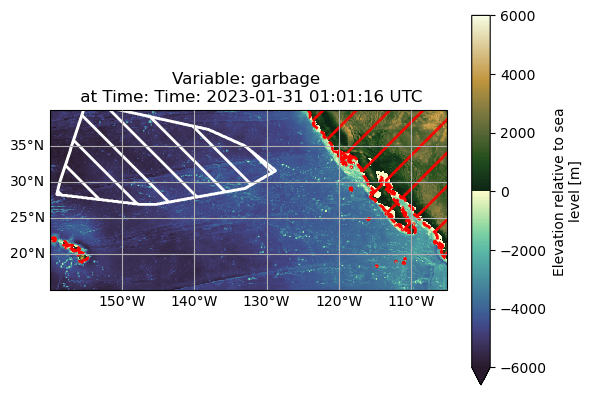

<Figure size 600x600 with 0 Axes>

In [32]:
# # West Coast
# lon_bnds = [-123, -105]
# lat_bnds = [18, 35]
# ax = b.plot_data_over_area(
#     x_interval=lon_bnds,
#     y_interval=lat_bnds,
#     return_ax=True,
# )
# ax = b.plot_mask_from_xarray(
#     xarray=b.get_data_over_area(x_interval=lon_bnds, y_interval=lat_bnds), ax=ax, masking_val=-150
# )
# plt.show()

# # Hawaii
# lon_bnds = [-160, -152]
# lat_bnds = [16, 23]
# ax = b.plot_data_over_area(
#     x_interval=lon_bnds,
#     y_interval=lat_bnds,
#     return_ax=True,
# )
# ax = b.plot_mask_from_xarray(
#     xarray=b.get_data_over_area(x_interval=lon_bnds, y_interval=lat_bnds), ax=ax, masking_val=-150
# )
# plt.show()
#fig = plt.figure(figsize=(24, 8))
ax = set_up_geographic_ax()
# Region 1
lon_bnds = [-160, -105]
lat_bnds = [15, 40]
ax = b.plot_data_over_area(
    x_interval=lon_bnds,
    y_interval=lat_bnds,
    return_ax=True,
    ax=ax
)
ax.get_figure().savefig("1.png", dpi=300)
ax = b.plot_mask_from_xarray(
    xarray=b.get_data_over_area(x_interval=lon_bnds, y_interval=lat_bnds), ax=ax, masking_val=-150
)
ax.get_figure().savefig("2.png", dpi=300)
ax = g.plot_mask_from_xarray(
    xarray=g.get_data_over_area(x_interval=lon_bnds, y_interval=lat_bnds),
    ax=ax,
)
ax.get_figure().savefig("3.png", dpi=300)


In [33]:
from scripts.safety.shipping_lanes import Graph, Edge, Node, plot_graph
ports = [
    ["Vancouver", 49.290, -123.11],
    ["Oakland", 37.804, -122.27],
    ["Los Angeles", 33.740, -118.28],
    ["Lazaro Cardenas", 17.927, -102.269],
    ["Honolulu", 21.309, -157.87],
    ["Tokyo", 35.619, 139.796],
    ["Shanghai", 31.220, 121.487],
    ["Singapore", 1.274, 103.802],
]
lanes = [
    ["Oakland", "Los Angeles"],
    ["Oakland", "Vancouver"],
    ["Los Angeles", "Honolulu", 2],
    ["Oakland", "Honolulu", 1],
    ["Tokyo", "Honolulu"],
    ["Los Angeles", "Singapore"],
    ["Oakland", "Shanghai"],
    ["Vancouver", "Shanghai"],
    ["Lazaro Cardenas", "Shanghai"],
]
graph = Graph()
for port in ports:
    graph.add_node(Node(*port))
for lane in lanes:
    graph.add_edge(Edge(*lane))

In [34]:
ax = plot_graph(graph, ax)
ax.get_figure().savefig("4.png", dpi=300)


In [36]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Dept <150m')
white_patch = mpatches.Patch(color='white', label='Garbage')
gold_patch = mpatches.Patch(color='gold', label='Shipping Lane')
ax.legend(handles=[red_patch, white_patch, gold_patch], loc="lower center")
ax.get_figure().savefig("5.png", dpi=300)


In [1]:
import xarray as xr
import sys

min_d_map_name = "ocean_navigation_simulator/package_data/bathymetry_and_garbage/bathymetry_distance_res_0.083_0.083_max_elevation_-150.nc"

min_d_map_loaded = xr.open_dataset(min_d_map_name)


In [2]:
pwd

'/home/andy/code/OceanPlatformControl'

In [7]:
min_d_map_loaded["distance"][1000, 500].data

array(295.153, dtype=float32)